In [ ]:
# Gaussian Noise, 가우시안 노이즈
# 이미지의 압축, 전송 등의 과정에서 생기는 noise, 가우스 함수에 따른 분포(가우시안 분포, 정규분포)를 따른다.

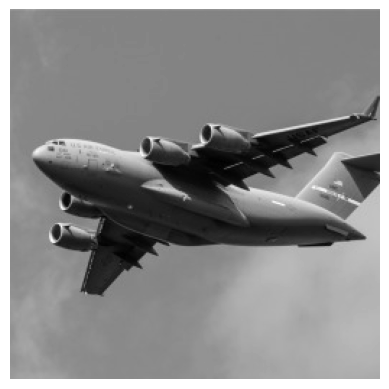

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("c:/data/images/plane_256x256.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.show()

In [2]:
import numpy as np
def make_noise(std, gray):
    height, width = gray.shape
    img_noise = np.zeros((height, width), dtype=float)
    for i in range(height):
        for a in range(width):
            make_noise = np.random.normal() # 랜덤함수를 이용하여 노이즈 적용
            set_noise = std * make_noise
            img_noise[i][a] = gray[i][a] + set_noise
    return img_noise

In [3]:
height, width = gray.shape
std = 20
img_noise = make_noise(std, gray)
img_noise2 = make_noise(std, gray)
img_noise3 = make_noise(std, gray)
img_noise4 = make_noise(std, gray)
out2 = np.zeros((height, width), dtype=float)
out3 = np.zeros((height, width), dtype=float)
out4 = np.zeros((height, width), dtype=float)
# 이미지 평균 연산
for i in range(height):
    for j in range(width):
        if (img_noise[i][j] + img_noise2[i][j]) / 2 > 255:
            out2[i][j] = 255
        else:
            out2[i][j] = (img_noise[i][j] + img_noise2[i][j]) / 2 # 2개의 이미지의 평균
        if (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j]) / 3 > 255:
            out3[i][j] = 255
        else:
            # 3개의 이미지의 평균
            out3[i][j] = (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j]) / 3
        if (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j] + img_noise4[i][j]) / 4 > 255:
            out4[i][j] = 255
        else:
            # 4개의 이미지의 평균
            out4[i][j] = (img_noise[i][j] + img_noise2[i][j] +
img_noise3[i][j] + img_noise4[i][j]) / 4

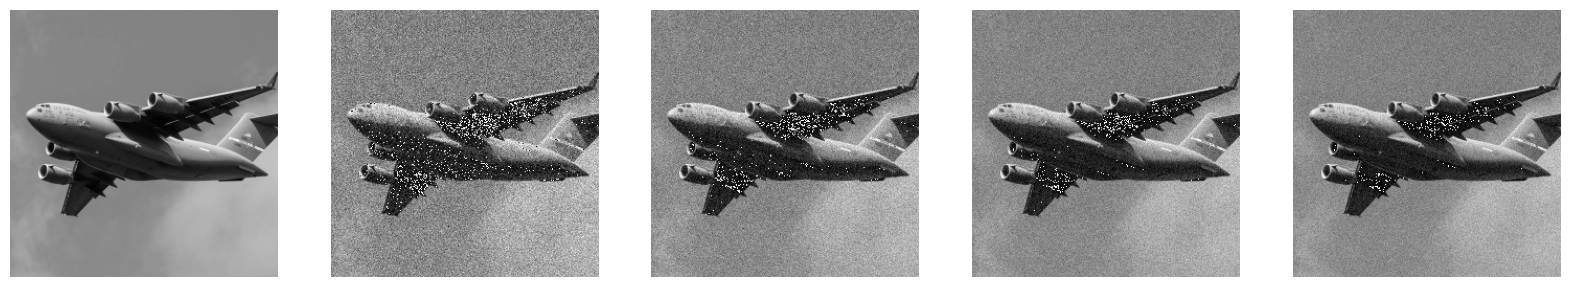

In [4]:
plt.figure(figsize=(20,6))
plt.subplot(1, 5, 1)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.subplot(1, 5, 2)
plt.imshow(img_noise.astype(np.uint8),cmap='gray')
plt.axis("off")
plt.subplot(1, 5, 3)
plt.imshow(out2.astype(np.uint8),cmap='gray')
plt.axis("off")
plt.subplot(1, 5, 4)
plt.imshow(out3.astype(np.uint8),cmap='gray')
plt.axis("off")
plt.subplot(1, 5, 5)
plt.imshow(out4.astype(np.uint8),cmap='gray')
plt.axis("off")
plt.show()
# 1번: 원본 이미지
# 2번: 노이즈가 있는 이미지
# 3,4,5번으로 갈수록 노이즈가 감소하고 있음.